# [Genieclust](https://github.com/gagolews/genieclust) Tutorial
## Additional Plotting Functions in `genieclust.plots`

> **It is a draft version of the tutorial distributed in the hope that it will be useful.**

Author: [Marek Gagolewski](http://www.gagolewski.com)

The genieclust package introduces some `matplotlib`-based plotting functions that I was missing (but are present in R's `graphics`).

# Load Example Data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path
import genieclust

In [2]:
path = os.path.join("..", "benchmark_data")
dataset = "jain"

# Load an example 2D dataset
X = np.loadtxt("%s/%s.data.gz" % (path,dataset), ndmin=2)

# Load the corresponding reference labels.
# The original labels are in {1,2,..,k} and 0 denotes the noise cluster.
# Let's make them more Python-ish by subtracting 1 (and hence the noise cluster will be marked as -1).
labels_true = np.loadtxt("%s/%s.labels0.gz" % (path,dataset), dtype=np.intp)-1
n_clusters = len(np.unique(labels_true))-(np.min(labels_true)==-1) # do not count the "noise" cluster (if present) as a separate entity

# Center and scale (proportionally in all the axes) all the points.
# Note: this is NOT a standardization of all the variables.
X = (X-np.mean(X))/np.std(X, ddof=1)

# `genieclust.plots.plot_scatter()`

Draws a scatter plot.

Usage: `genieclust.plots.plot_scatter(X, labels, **kwargs)`, where
    
* `X` is a two-column matrix giving the x and y coordinates of the points
* `labels` is a vector of integer labels corresponding to each point in X, giving its plot style

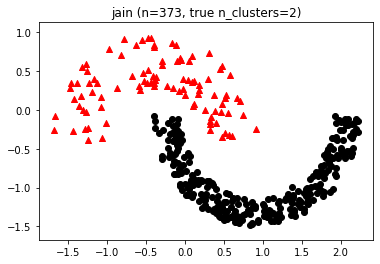

In [3]:
genieclust.plots.plot_scatter(X, labels_true)
plt.title("%s (n=%d, true n_clusters=%d)"%(dataset, X.shape[0], n_clusters))
plt.axis("equal")
plt.show()

Unlike in `matplitlib.pyplot.scatter()`, all points in `X`
corresponding to `labels == i` are always drawn in the same way,
    no matter the `max(labels)`.
    
Here are the first 10 plotting styles:

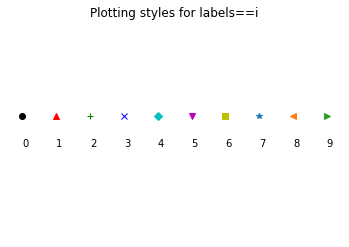

In [4]:
ncol = len(genieclust.plots.col)
nmrk = len(genieclust.plots.mrk)
mrk_recycled = np.tile(genieclust.plots.mrk, int(np.ceil(ncol/nmrk)))[:ncol]
styles = pd.DataFrame({"color":  genieclust.plots.col,
              "marker": mrk_recycled})
for i in range(10):
    plt.text(i, 0, i)
    plt.plot(i, 1, marker=styles["marker"][i], color=styles["color"][i])
plt.title("Plotting styles for labels==i")
plt.ylim(-3,4)
plt.axis('off')
plt.show()

# `genieclust.plots.plot_segments()`

Draws a set of disjoint line segments.

Usage: `genieclust.plots.plot_segments(X, pairs, style="k-", **kwargs)`, where

* `X` is a two-column matrix giving the X and Y coordinates of the points
* `pairs` is a two-column matrix, giving the pairs of indices
        defining the line segments
    
The function calls `matplotlib.pyplot.plot()` only once → it's very fast.

The line segments are given by
    `(X[pairs[i,0],0], X[pairs[i,0],1])` -- `(X[pairs[i,1],0], X[pairs[i,1],1])`,
    `i = 0, ...., pairs.shape[0]-1`.

In [5]:
# Example: draw the minimum spanning tree
pairs = genieclust.internal.mst_from_distance(X)[1]
pairs[:6,:6] # preview

array([[209, 210],
       [238, 239],
       [253, 307],
       [340, 341],
       [254, 255],
       [234, 235]])

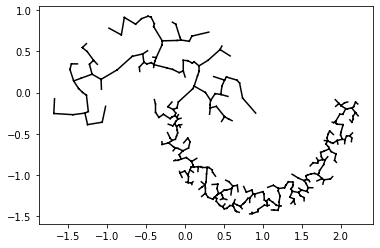

In [6]:
genieclust.plots.plot_segments(X, pairs)